In [1]:
a<-read.table('angptmyocgrp94.raw',header = T, sep = "")

In [2]:
a[1,]

FID,IID,PAT,MAT,SEX,PHENOTYPE,rs28991009_T,X1.171605478_G_A_A,X12.104245046_G_A_A,X12.104332224_C_T_T
1000028,1000028,0,0,2,-9,0,0,0,0


In [5]:
table(a[,7])
table(a[,8])
table(a[,9])
table(a[,10])


     0      1      2 
331286   5410     28 


     0      1 
336194    829 


     0      1      2 
259874  72334   4990 


     0      1      2 
325663   9932     70 

In [6]:
b<-read.table('angptmyocgrp94.cov',header = T, sep = " ")

In [7]:
b[1,]

FID,IID,age,sex,Array,PC1,PC2,PC3,PC4,X
1000028,1000028,54,0,1,-13.9881,3.69742,-0.379325,2.41561,NA


In [8]:
df.1 <- merge(a,b,by.x = "FID",by.y = "FID")

In [9]:
df.1[1,]

FID,IID.x,PAT,MAT,SEX,PHENOTYPE,rs28991009_T,X1.171605478_G_A_A,X12.104245046_G_A_A,X12.104332224_C_T_T,IID.y,age,sex,Array,PC1,PC2,PC3,PC4,X
1000028,1000028,0,0,2,-9,0,0,0,0,1000028,54,0,1,-13.9881,3.69742,-0.379325,2.41561,NA


In [12]:
df <- df.1[df.1$PHENOTYPE != -9, ]

In [13]:
table(df[,7:8])

            X1.171605478_G_A_A
rs28991009_T     0     1
           0 79786   206
           1  1349     3
           2     5     0

In [19]:
df <- df[df$PHENOTYPE != "NA",]

In [32]:
df[df$rs28991009_T == 1 & df$X1.171605478_G_A_A == 1 & df$PHENOTYPE != "NA",c("PHENOTYPE","age","sex")]

,PHENOTYPE,age,sex
NA,NA,NA,NA
89233,32.02,71,1
NA.1,NA,NA,NA
97236,19.58,69,0
NA.2,NA,NA,NA
NA.3,NA,NA,NA
280847,13.25,64,0


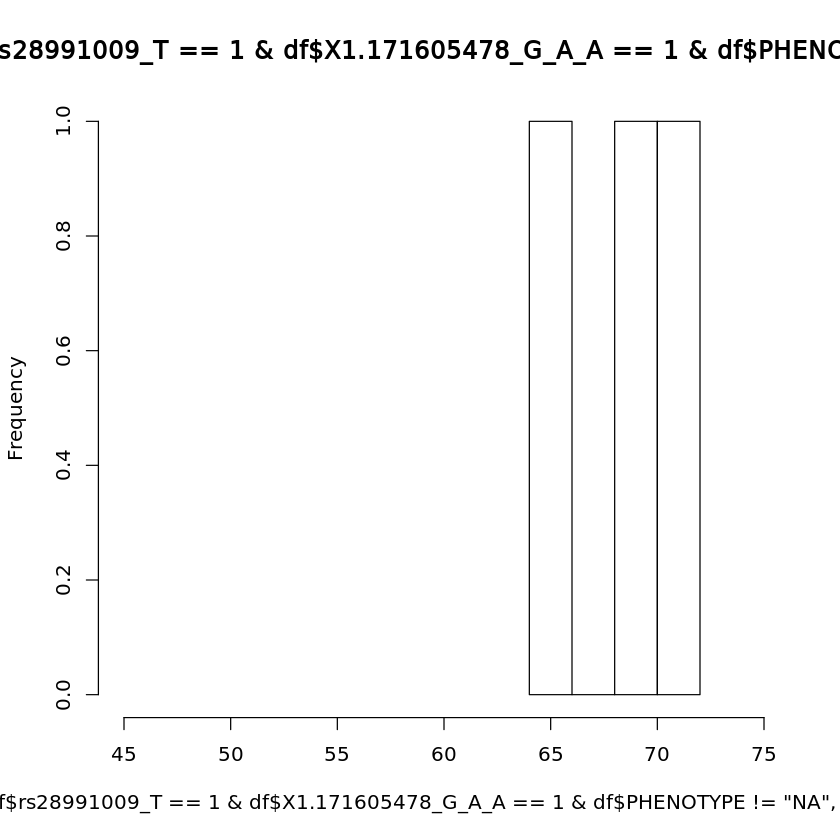

In [33]:
hist(df[df$rs28991009_T == 1 & df$X1.171605478_G_A_A == 1 & df$PHENOTYPE != "NA",c("age")], xlim = c(45, 75))

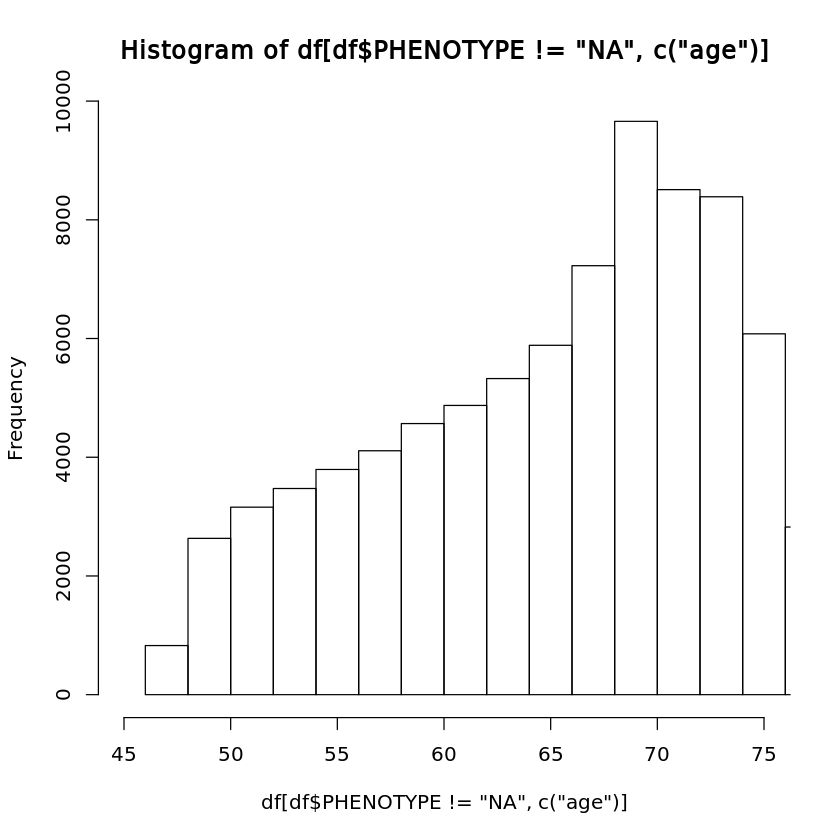

In [34]:
hist(df[df$PHENOTYPE != "NA",c("age")], xlim = c(45, 75))

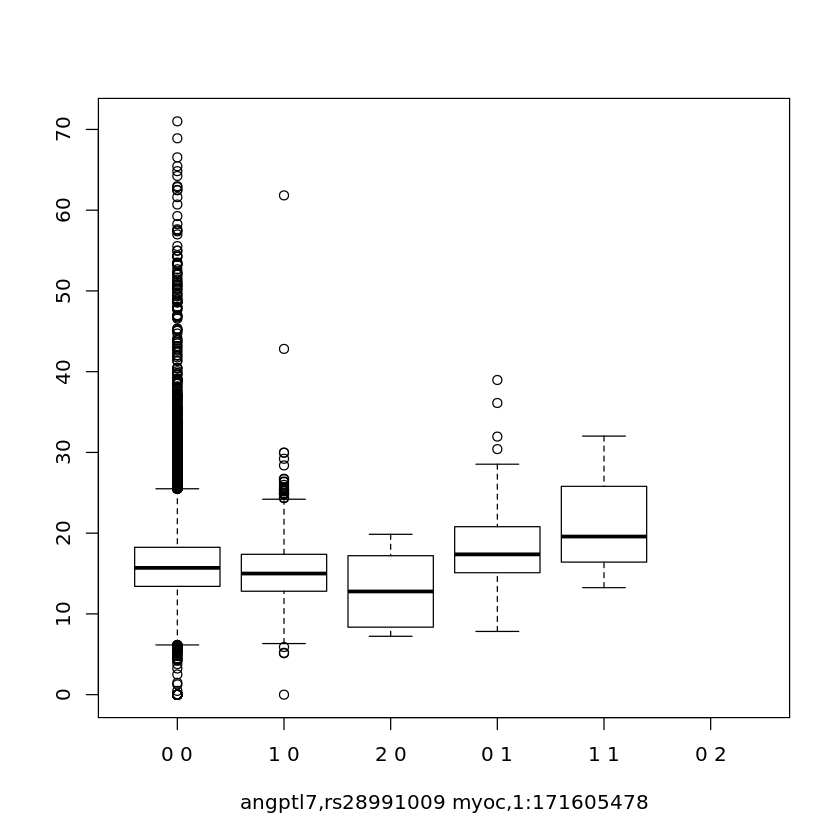

In [29]:
boxplot(PHENOTYPE ~ rs28991009_T + X1.171605478_G_A_A, data = df, names = c("0 0","1 0", "2 0", "0 1", "1 1","0 2"), xlab = "angptl7,rs28991009 myoc,1:171605478")

In [25]:
colnames(df)

[1] "FID"                 "IID.x"               "PAT"                
 [4] "MAT"                 "SEX"                 "PHENOTYPE"          
 [7] "rs28991009_T"        "X1.171605478_G_A_A"  "X12.104245046_G_A_A"
[10] "X12.104332224_C_T_T" "IID.y"               "age"                
[13] "sex"                 "Array"               "PC1"                
[16] "PC2"                 "PC3"                 "PC4"                
[19] "X"

In [31]:
summary(glm(PHENOTYPE ~ age + sex + PC1 + PC2 + PC3 + PC4 + rs28991009_T*X1.171605478_G_A_A , data = df))


Call:
glm(formula = PHENOTYPE ~ age + sex + PC1 + PC2 + PC3 + PC4 + 
    rs28991009_T * X1.171605478_G_A_A, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-16.528   -2.626   -0.330    2.206   54.921  

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     13.114515   0.161275  81.318  < 2e-16 ***
age                              0.040112   0.001777  22.570  < 2e-16 ***
sex                              0.124215   0.027909   4.451 8.57e-06 ***
PC1                             -0.014652   0.009082  -1.613   0.1067    
PC2                              0.017556   0.009392   1.869   0.0616 .  
PC3                              0.007777   0.009000   0.864   0.3875    
PC4                              0.003980   0.005144   0.774   0.4391    
rs28991009_T                    -0.746252   0.108206  -6.897 5.37e-12 ***
X1.171605478_G_A_A               1.975490   0.276949   7.133 9.90e-13 ***
rs28991009_

## get glaucoma 

In [35]:
g<-read.table('angptmyocgrp94.glaucoma.raw',header = T, sep = " ")

In [36]:
g[1,]

FID,IID,PAT,MAT,SEX,PHENOTYPE,rs28991009_T,X1.171605478_G_A_A,X12.104245046_G_A_A,X12.104332224_C_T_T
1000028,1000028,0,0,2,1,0,0,0,0


In [37]:
df <- merge(df,g[,c("FID","PHENOTYPE")], by.x = "FID", by.y = "FID")

In [39]:
colnames(df[1,])

[1] "FID"                 "IID.x"               "PAT"                
 [4] "MAT"                 "SEX"                 "PHENOTYPE.x"        
 [7] "rs28991009_T"        "X1.171605478_G_A_A"  "X12.104245046_G_A_A"
[10] "X12.104332224_C_T_T" "IID.y"               "age"                
[13] "sex"                 "Array"               "PC1"                
[16] "PC2"                 "PC3"                 "PC4"                
[19] "X"                   "PHENOTYPE.y"

In [49]:
df[df$rs28991009_T == 1 & df$X1.171605478_G_A_A == 1 & df$PHENOTYPE.x != "NA",c("PHENOTYPE.x","PHENOTYPE.y","age","sex")]

,PHENOTYPE.x,PHENOTYPE.y,age,sex
NA,NA,NA,NA,NA
21527,32.02,0,71,1
NA.1,NA,NA,NA,NA
23459,19.58,0,69,0
NA.2,NA,NA,NA,NA
NA.3,NA,NA,NA,NA
67963,13.25,0,64,0


In [44]:
df$PHENOTYPE.y[df$PHENOTYPE.y ==1] <- 0 
df$PHENOTYPE.y[df$PHENOTYPE.y == 2] <- 1 
table(df$PHENOTYPE.y)


    0     1 
79940  1594 

In [48]:
summary(glm(PHENOTYPE.y ~ 0 + age + age*age + sex + PC1 + PC2 + PC3 + PC4 + rs28991009_T*X1.171605478_G_A_A , data = df, family = "binomial"))


Call:
glm(formula = PHENOTYPE.y ~ 0 + age + age * age + sex + PC1 + 
    PC2 + PC3 + PC4 + rs28991009_T * X1.171605478_G_A_A, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0844  -0.2267  -0.1897  -0.1583   3.4002  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
age                             -2.077e-04  2.123e-03  -0.098  0.92205    
sex                              2.313e-01  4.927e-02   4.696 2.66e-06 ***
PC1                              3.158e-01  1.241e-02  25.439  < 2e-16 ***
PC2                             -7.003e-02  1.630e-02  -4.297 1.73e-05 ***
PC3                             -1.757e-02  1.581e-02  -1.112  0.26626    
PC4                              4.696e-02  8.910e-03   5.270 1.36e-07 ***
rs28991009_T                    -7.825e-01  2.799e-01  -2.796  0.00517 ** 
X1.171605478_G_A_A               1.962e+00  2.147e-01   9.137  < 2e-16 ***
rs28991009_T:X1.171605478_G_A_A 

In [50]:
e<-read.table('angptmyocgrp94.age.raw',header = T, sep = " ")

In [52]:
colnames(e)

[1] "FID"                 "IID"                 "PAT"                
 [4] "MAT"                 "SEX"                 "PHENOTYPE"          
 [7] "rs28991009_T"        "X1.171605478_G_A_A"  "X12.104245046_G_A_A"
[10] "X12.104332224_C_T_T"

In [ ]:
summary(glm(PHENOTYPE ~  rs28991009_T + X1.171605478_G_A_A , data = e))

In [55]:
e.1 <- e[e$PHENOTYPE != -9,]

In [ ]:
1+1

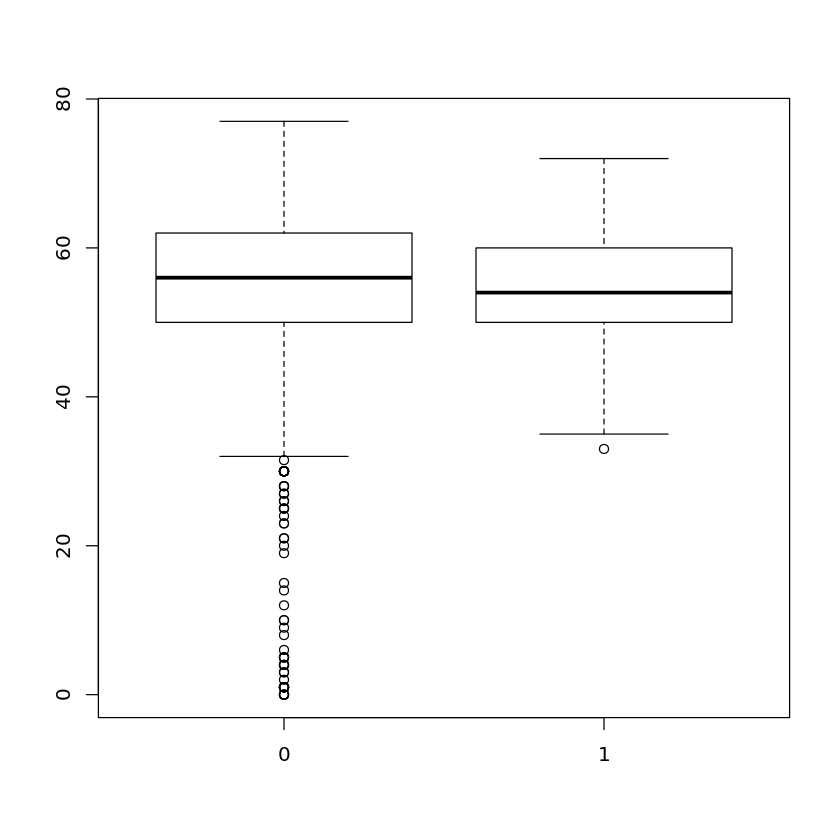

In [56]:
boxplot(PHENOTYPE ~ rs28991009_T, data = e.1)

In [60]:
t.test(PHENOTYPE ~   X1.171605478_G_A_A , data = e.1)


	Welch Two Sample t-test

data:  PHENOTYPE by X1.171605478_G_A_A
t = 1.5913, df = 30.994, p-value = 0.1217
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8289392  6.7141899
sample estimates:
mean in group 0 mean in group 1 
       54.65230        51.70968 


In [61]:
t.test(PHENOTYPE ~   rs28991009_T , data = e.1)


	Welch Two Sample t-test

data:  PHENOTYPE by rs28991009_T
t = 0.49471, df = 20.455, p-value = 0.6261
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.524647  5.720333
sample estimates:
mean in group 0 mean in group 1 
       54.62165        53.52381 


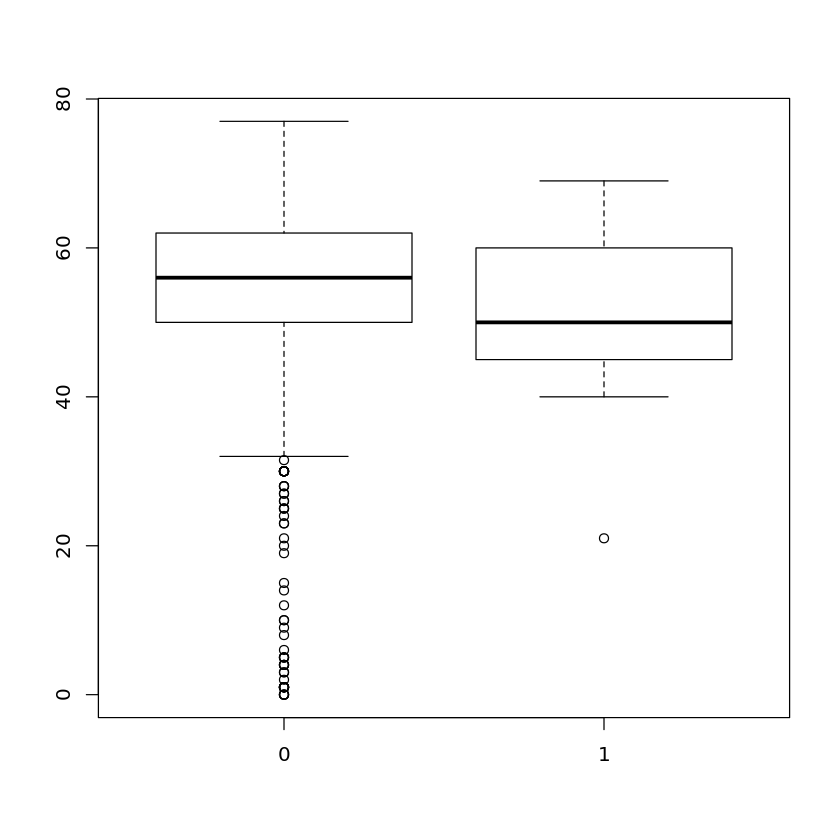

In [62]:
boxplot(PHENOTYPE ~ X1.171605478_G_A_A, data = e.1)

In [64]:
e.1$PHENOTYPE[e.1$X1.171605478_G_A_A == 1]


[1] NA

[1] NA

In [68]:
summary(e.1$PHENOTYPE[e.1$X1.171605478_G_A_A == 1 & !is.na(e.1$PHENOTYPE)])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  21.00   45.00   50.00   51.71   60.00   69.00       1 

## Exomes lookups 


In [3]:
res.exomes <- read.csv('/oak/stanford/groups/mrivas/users/magu/repos/rivas-lab/ukbb-tools/04_gwas/whole_pop/ukb24983_v2.INI5255.exome-spb.PHENO1.glm.linear',header = T, sep = "\t")

In [4]:
names(res.exomes)

[1] "X.CHROM" "POS"     "ID"      "REF"     "ALT"     "A1"      "TEST"   
 [8] "OBS_CT"  "BETA"    "SE"      "T_STAT"  "P"

### process annotation files - remove brackets 


In [7]:
import os
import sys
fout = open('annot.exomes.tsv','w')
fin = open('/oak/stanford/groups/mrivas/ukbb24983/exome/pgen/spb/data/ukbb-exome-spb-v1-post_qc-variant_annots.tsv','r').readlines()
print('varid','\t'.join(fin[0].rstrip().split('\t')),sep = "\t",file = fout)
for line in fin[1:]:
    line = line.rstrip()
    line = line.split('\t')
    locus = line[0]
    alleles = line[1]
    alleles = alleles.strip('[').strip(']').strip('"').strip('"').split(',')
    alleles = alleles[0].strip('"') + ':' + alleles[1].strip('"')
    id = locus.strip('chr') + ":" + alleles
    print(id,'\t'.join(line[0:]),sep = "\t",file = fout)
    
fout.close()

### switch to R kernel 

In [1]:
annot <- read.csv('annot.exomes.tsv',header = T, sep = "\t")

In [2]:
names(annot)

[1] "varid"                   "locus"                  
 [3] "alleles"                 "lof"                    
 [5] "lof_info"                "hgvsp"                  
 [7] "gene"                    "most_severe_consequence"
 [9] "AC"                      "AN"                     
[11] "eur_maf"                 "exac_nfe_maf"

In [4]:
res.exomes <- read.csv('/oak/stanford/groups/mrivas/users/magu/repos/rivas-lab/ukbb-tools/04_gwas/whole_pop/ukb24983_v2.INI5255.exome-spb.PHENO1.glm.linear',header = T, sep = "\t")

In [5]:
names(res.exomes)

[1] "X.CHROM" "POS"     "ID"      "REF"     "ALT"     "A1"      "TEST"   
 [8] "OBS_CT"  "BETA"    "SE"      "T_STAT"  "P"

In [23]:
res.exomes$idf <- do.call(paste, c(res.exomes[c("X.CHROM","POS","REF","ALT")], sep=":"))

In [24]:
res.exomes[1,]

X.CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P,idf
1,69081,1:69081:G:C,G,C,C,ADD,41061,0.33791,0.191533,1.76424,0.0776984,1:69081:G:C


In [26]:
res.df <- merge(res.exomes, annot, by.x = "idf", by.y = "varid")

In [27]:
table(res.df$most_severe_consequence)


     frameshift_variant        inframe_deletion       inframe_insertion 
                 104060                   34933                   13643 
       missense_variant splice_acceptor_variant    splice_donor_variant 
                2570484                   23199                   29407 
  splice_region_variant              start_lost             stop_gained 
                 296196                   10284                   80230 
              stop_lost      synonymous_variant 
                   4988                 1229382 

In [28]:
names(res.df)

[1] "idf"                     "X.CHROM"                
 [3] "POS"                     "ID"                     
 [5] "REF"                     "ALT"                    
 [7] "A1"                      "TEST"                   
 [9] "OBS_CT"                  "BETA"                   
[11] "SE"                      "T_STAT"                 
[13] "P"                       "locus"                  
[15] "alleles"                 "lof"                    
[17] "lof_info"                "hgvsp"                  
[19] "gene"                    "most_severe_consequence"
[21] "AC"                      "AN"                     
[23] "eur_maf"                 "exac_nfe_maf"

In [39]:
res.df[!is.na(res.df$P) & res.df$P <= .01 & res.df$most_severe_consequence %in%  c("frameshift_variant","splice_donor_variant","stop_gained","stop_lost","start_lost","splice_acceptor_variant"),c("idf","BETA","SE","P","gene")]

,idf,BETA,SE,P,gene
810,1:100218691:GGT:G,1.561930,0.5744820,6.55386e-03,"[DBT,DBT,AL445928.2]"
1679,1:100874220:CATCT:C,3.191940,0.9947510,1.33401e-03,"[EXTL2,EXTL2,EXTL2,EXTL2,EXTL2]"
3704,1:103082886:TTC:T,-3.490920,0.9949640,4.50978e-04,"[COL11A1,COL11A1,COL11A1,COL11A1,COL11A1,COL11A1,COL11A1,COL11A1,COL11A1,COL11A1]"
4228,1:103573062:G:A,-2.749580,0.9953270,5.73873e-03,"[AMY2B,ACTG1P4,AMY2B,AMY2B,AMY2B,AMY2B,AMY2B,AMY2B,AMY2B]"
5065,1:10404244:C:CCCAT,-2.726490,0.9950080,6.14351e-03,"[PGD,PGD,PGD,PGD,PGD,PGD,PGD]"
9879,1:108728743:AGAAAG:A,-2.804570,0.9950170,4.82542e-03,"[FNDC7,FNDC7]"
10695,1:108929821:CAG:C,0.922878,0.2487770,2.07816e-04,"[GPSM2,CLCC1,CLCC1,CLCC1,AL449266.1,CLCC1,CLCC1,CLCC1,CLCC1,GPSM2,CLCC1,CLCC1,GPSM2,GPSM2]"
14941,1:10957639:G:A,-1.884800,0.7035840,7.39025e-03,"[C1orf127,C1orf127,C1orf127]"
15550,1:109657770:A:T,1.652330,0.5751540,4.06991e-03,"[GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4,GSTM4]"
15950,1:109717382:C:T,1.371950,0.4975640,5.82999e-03,"[GSTM5,GSTM5,GSTM5,GSTM5,GSTM5,GSTM5,GSTM5,GSTM5]"


In [41]:
res.df[!is.na(res.df$P) & res.df$P <= .00001 & res.df$most_severe_consequence %in%  c("missense_variant","inframe_insertion","inframe_deletion"),c("idf","BETA","SE","P","gene")]

,idf,BETA,SE,P,gene
22912,1:11193627:G:T,-0.1870420,0.04039680,3.66575e-06,"[MTOR,ANGPTL7,ANGPTL7]"
66494,1:149934520:T:C,-0.0352988,0.00715170,8.01641e-07,"[MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,MTMR11,OTUD7B]"
664489,11:120469351:A:T,0.0754353,0.01572060,1.60408e-06,"[ARHGEF12,ARHGEF12,ARHGEF12,ARHGEF12,ARHGEF12,ARHGEF12]"
705038,11:18743056:G:A,-2.6541700,0.57477400,3.89066e-06,"[PTPN5,PTPN5,PTPN5,PTPN5,PTPN5,AC103974.1]"
743014,11:47248704:C:T,0.0362159,0.00749842,1.37155e-06,"[ACP2,NR1H3,NR1H3,NR1H3,NR1H3,ACP2,NR1H3,NR1H3,NR1H3,NR1H3,ACP2,ACP2,ACP2,NR1H3,ACP2,NR1H3,ACP2,ACP2,ACP2,ACP2,ACP2,NR1H3,NR1H3,ACP2,ACP2,ACP2,NR1H3]"
813205,11:65109421:C:T,2.8512600,0.57465300,7.01540e-07,"[TM7SF2,VPS51,TM7SF2,TM7SF2,TM7SF2,TM7SF2,TM7SF2,TM7SF2,VPS51,TM7SF2,VPS51,VPS51,TM7SF2,TM7SF2,TM7SF2,VPS51,TM7SF2,AP003068.1,VPS51,TM7SF2,TM7SF2,TM7SF2,TM7SF2,TM7SF2,VPS51,TM7SF2,VPS51,TM7SF2,TM7SF2,VPS51,TM7SF2,TM7SF2,VPS51,TM7SF2,VPS51,TM7SF2,VPS51,VPS51,TM7SF2,VPS51,VPS51,TM7SF2]"
876359,11:802379:T:C,-0.0406203,0.00702343,7.36736e-09,"[PIDD1,PIDD1,PIDD1,SLC25A22,PIDD1,PIDD1,PIDD1,PIDD1,SLC25A22,SLC25A22,PIDD1,SLC25A22,PIDD1,SLC25A22,SLC25A22,SLC25A22,PIDD1,PIDD1,PANO1,SLC25A22]"
877425,11:824789:T:C,0.0408687,0.00787230,2.09646e-07,"[PNPLA2,CRACR2B,CRACR2B,PNPLA2,PNPLA2,CRACR2B,CRACR2B,CRACR2B,CRACR2B,CRACR2B,AP006621.1,PNPLA2,CRACR2B,CRACR2B,CRACR2B,PNPLA2,AP006621.1,CRACR2B,CRACR2B,PNPLA2,CRACR2B]"
914590,12:108592169:A:G,-0.0325339,0.00699655,3.32976e-06,"[TMEM119,TMEM119,TMEM119,TMEM119]"
1051885,12:54459125:T:C,3.2539200,0.70383500,3.79138e-06,"[GTSF1,GTSF1,GTSF1,AC079313.2,GTSF1,GTSF1,GTSF1,AC079313.1]"
